#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from utils.plt_setting import plt_settings
from utils.evaluation import regression_evaluation, f_importances, plot_actual_pred
from utils.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X2')
df_y = read_data('2a-all-y2')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -167445943401283518464.000000, MAPE: 61623929161.426521, MSE: 2333066355435490219717491599343616.000000, RMSE: 48301825591125336.000000, MAE: 2584439914501204.500000
`LIN` object has no attribute `feature_importances_`


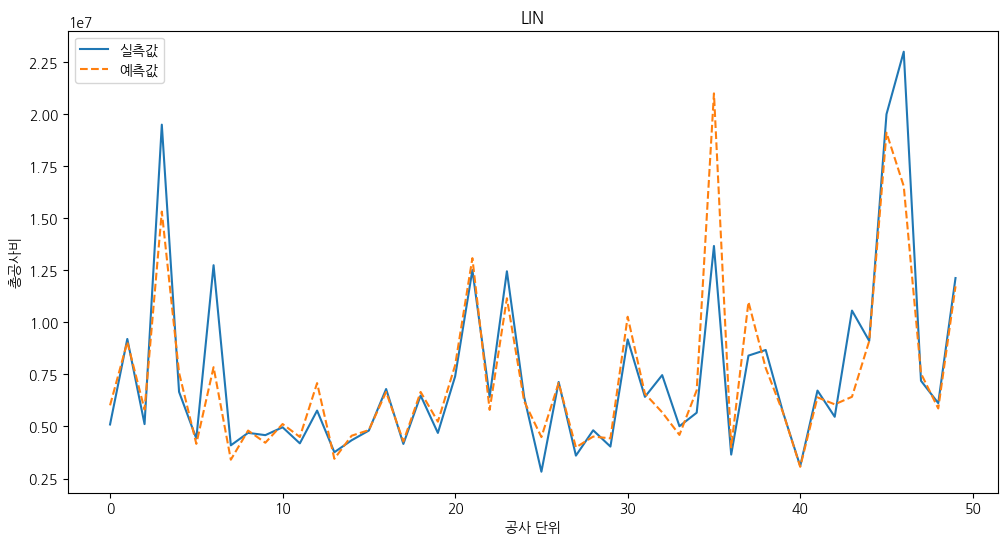

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.768e+15, tolerance: 3.748e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.711966, MAPE: 13.945993, MSE: 4013254026636.800781, RMSE: 2003310.766366, MAE: 1001191.753543
`LASSO` object has no attribute `feature_importances_`


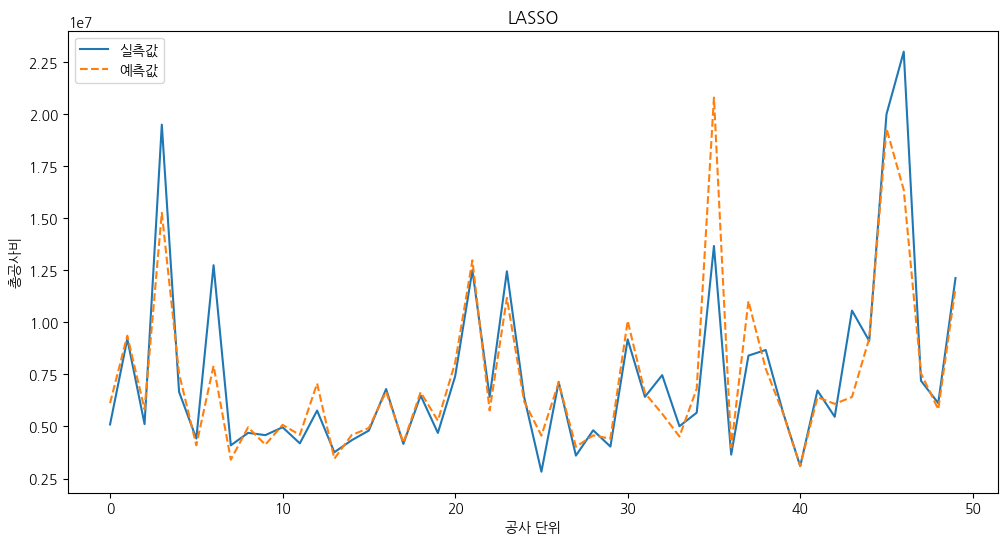

Evaluation: RIDGE
R2_SCORE: 0.715501, MAPE: 13.843475, MSE: 3963990803377.703125, RMSE: 1990977.348786, MAE: 991904.199585
`RIDGE` object has no attribute `feature_importances_`


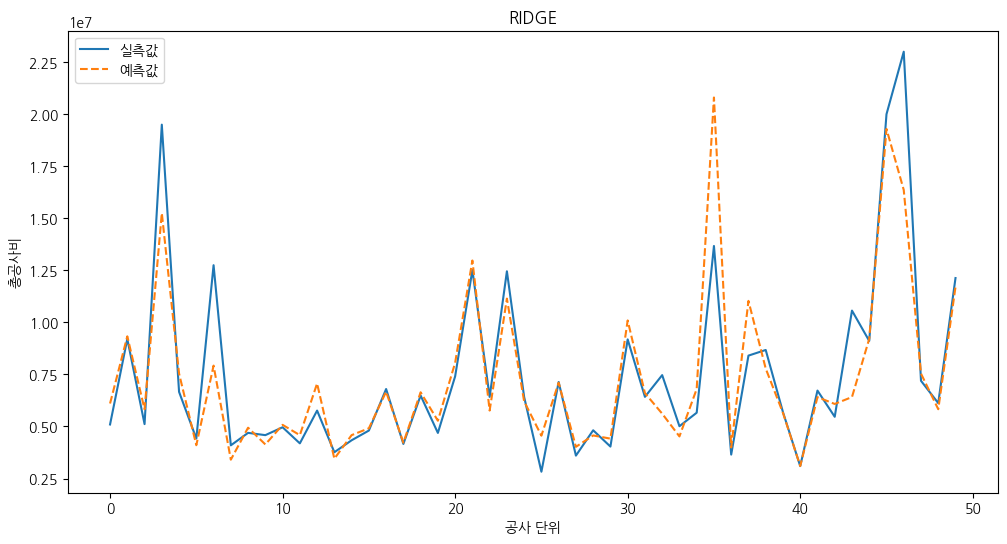

Evaluation: KNR
R2_SCORE: 0.533053, MAPE: 16.396609, MSE: 6506094600312.277344, RMSE: 2550704.726210, MAE: 1268984.688806
`KNR` object has no attribute `feature_importances_`


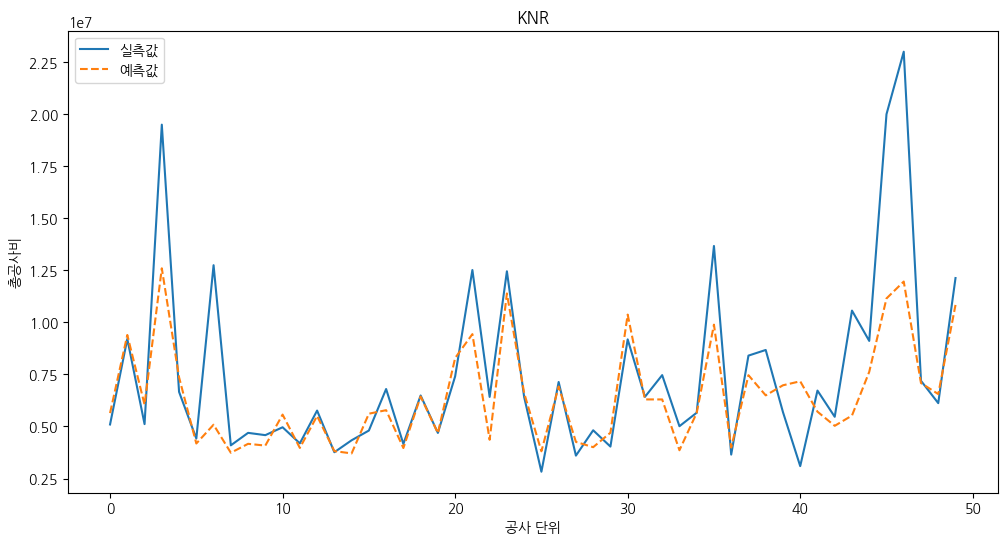

Evaluation: DTR
R2_SCORE: 0.279451, MAPE: 22.069712, MSE: 10039590139282.894531, RMSE: 3168531.227443, MAE: 1592338.376866


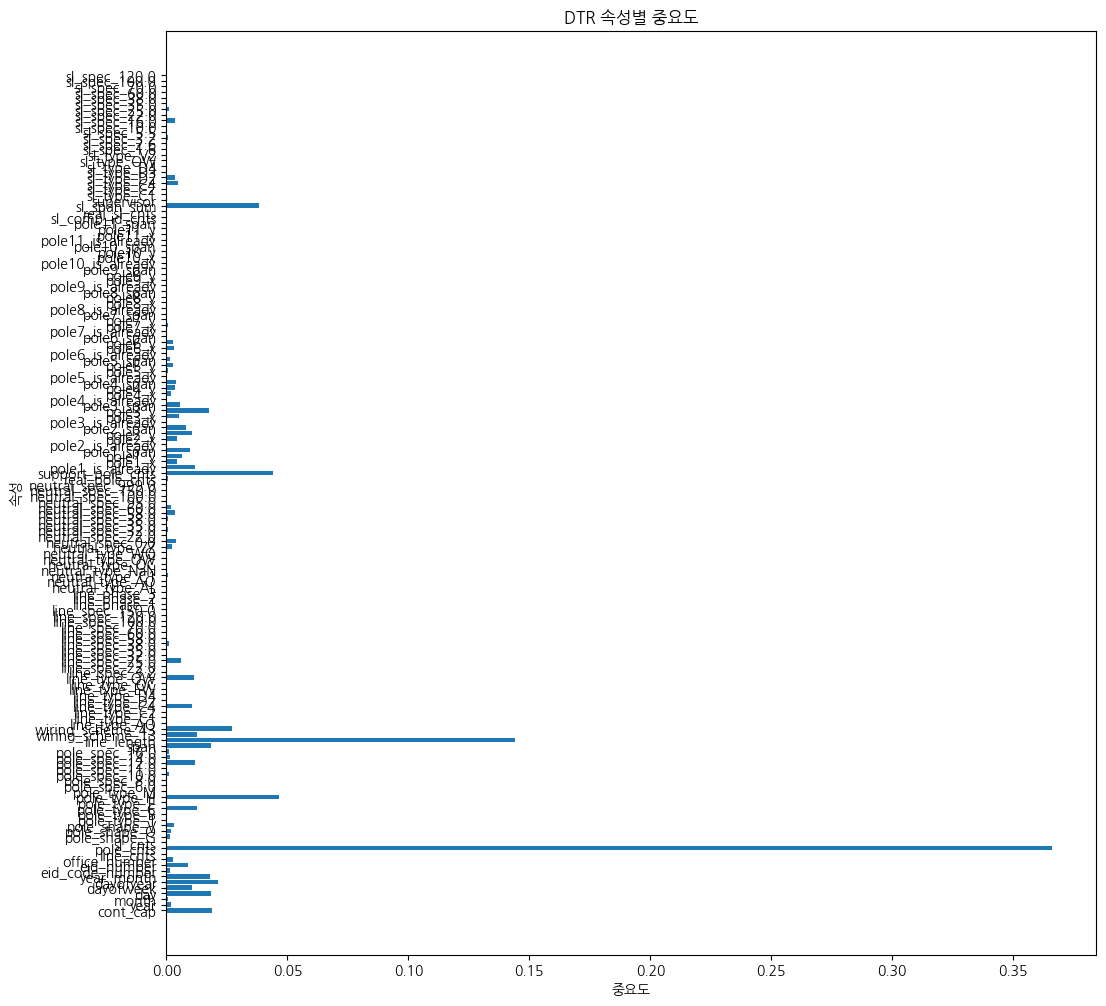

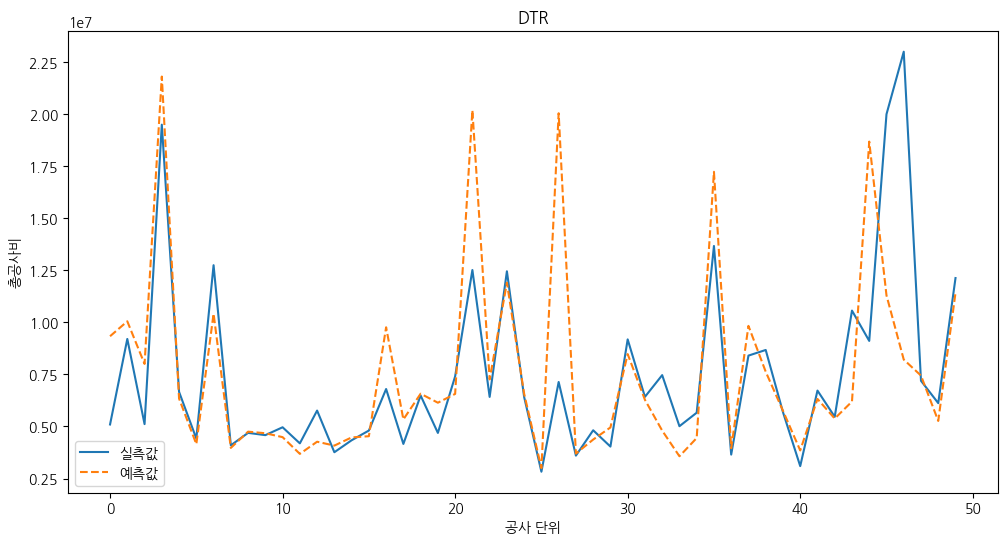

/tmp/ipykernel_7161/3261526636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Evaluation: RFR
R2_SCORE: 0.636996, MAPE: 15.022722, MSE: 5057823545417.240234, RMSE: 2248960.547768, MAE: 1111554.616561


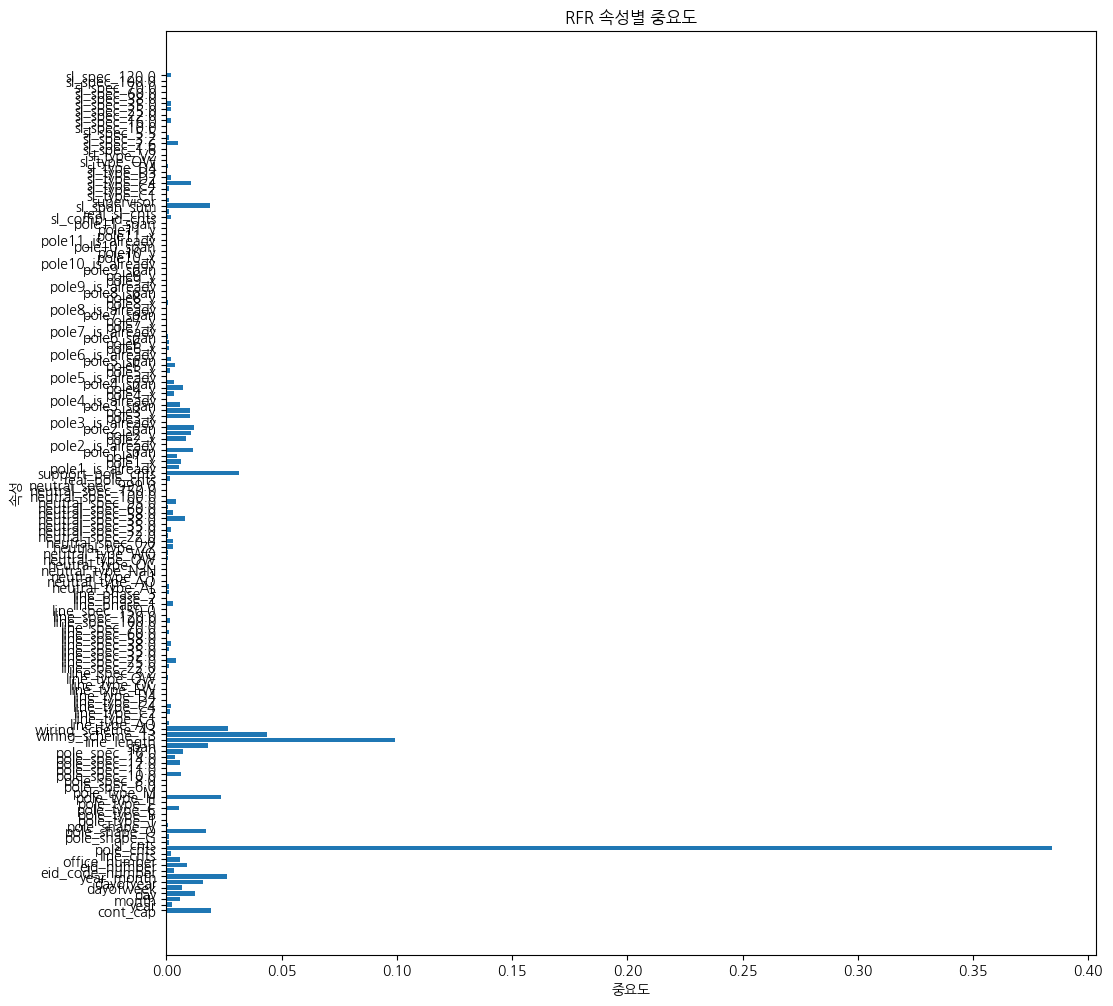

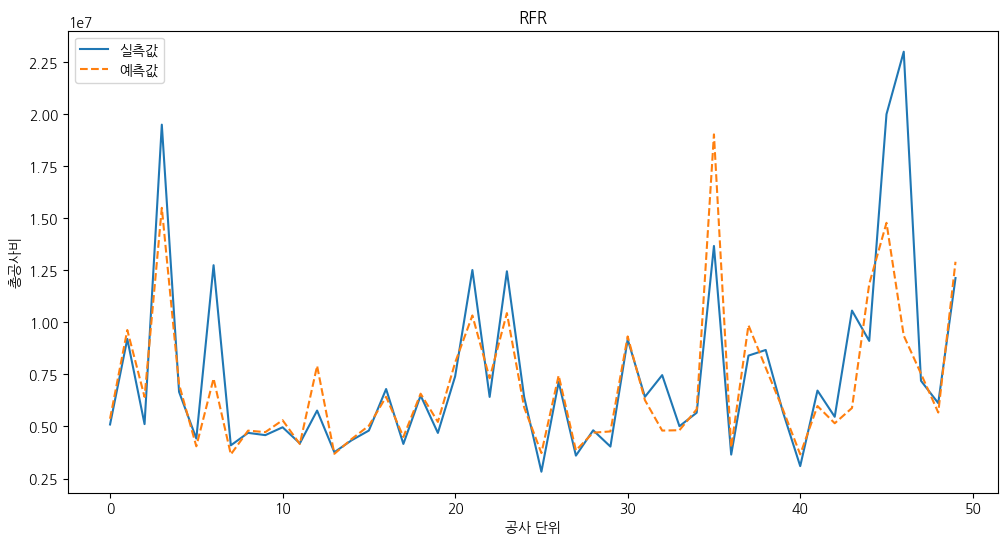

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.676769, MAPE: 13.607468, MSE: 4503662026977.944336, RMSE: 2122183.316063, MAE: 1008621.649078


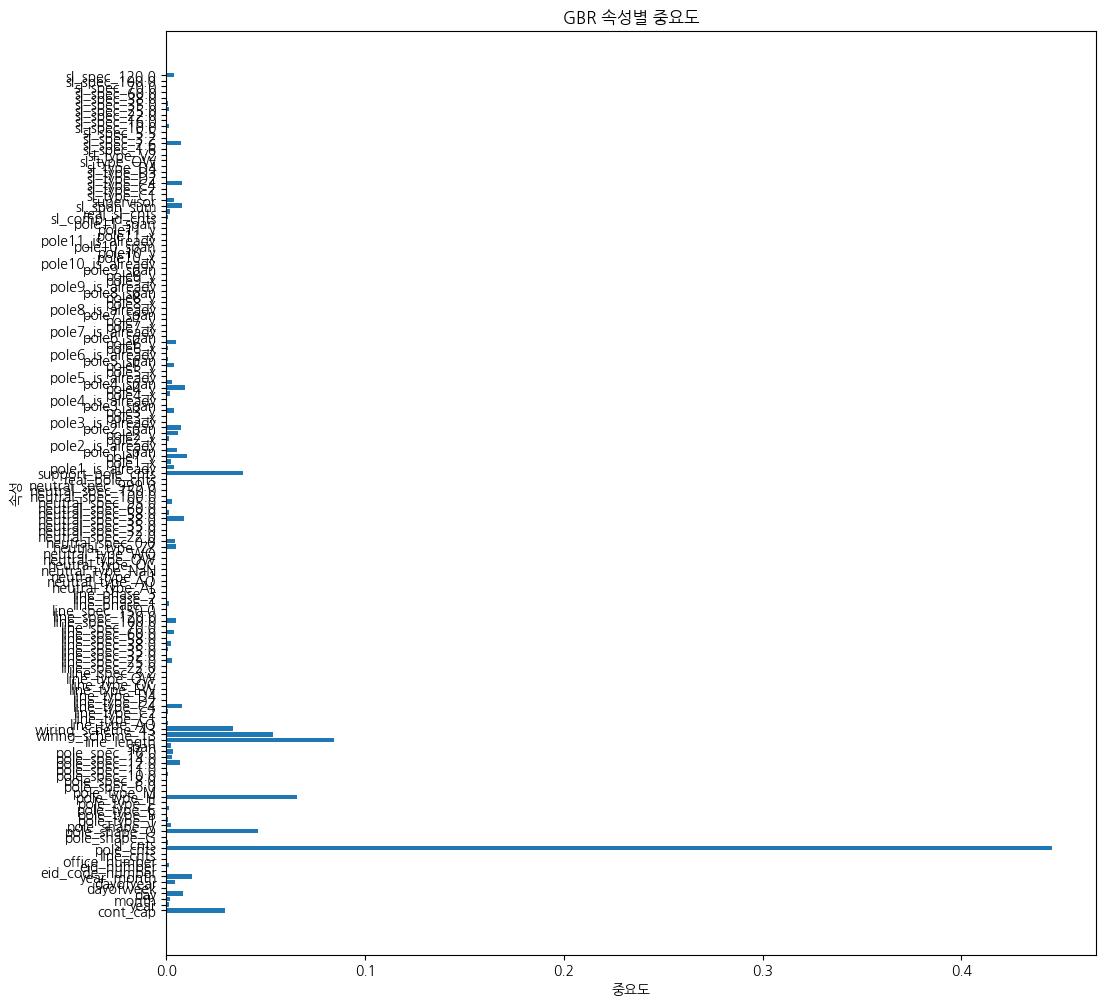

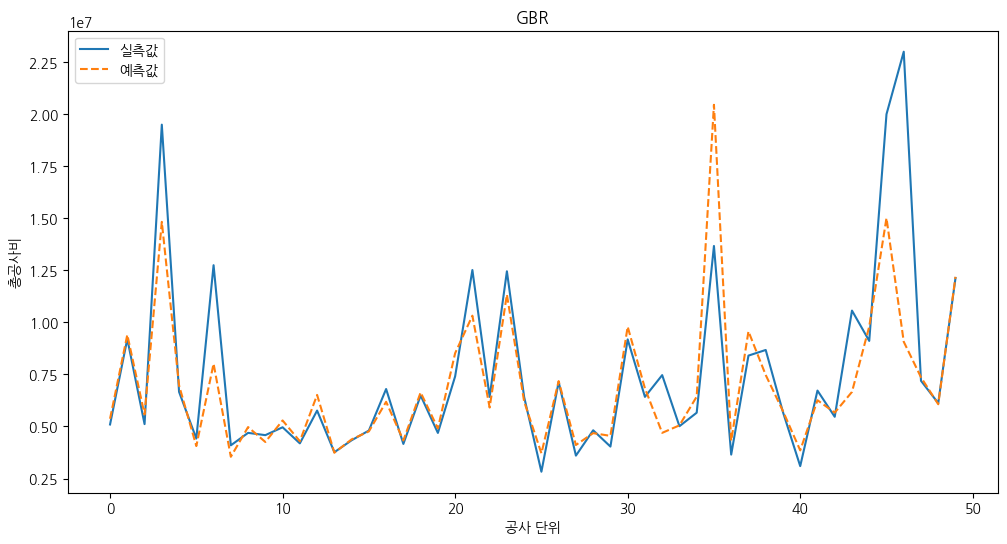

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.039e+15, tolerance: 3.748e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.707479, MAPE: 13.955253, MSE: 4075770570360.523438, RMSE: 2018853.776369, MAE: 1006150.883497
`EN` object has no attribute `feature_importances_`


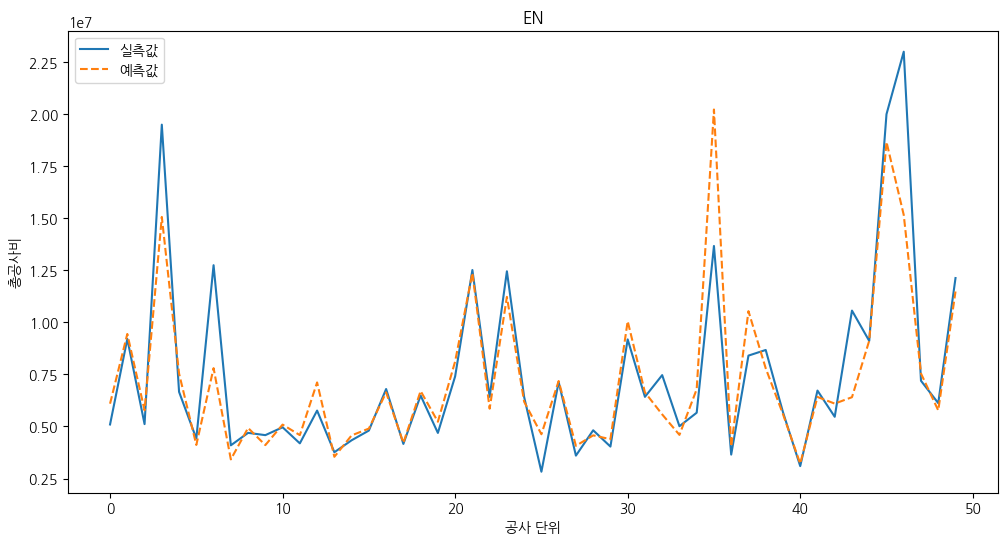

Evaluation: XGR
R2_SCORE: 0.073125, MAPE: 35.414305, MSE: 12914383215911.554688, RMSE: 3593658.750621, MAE: 2528176.277674


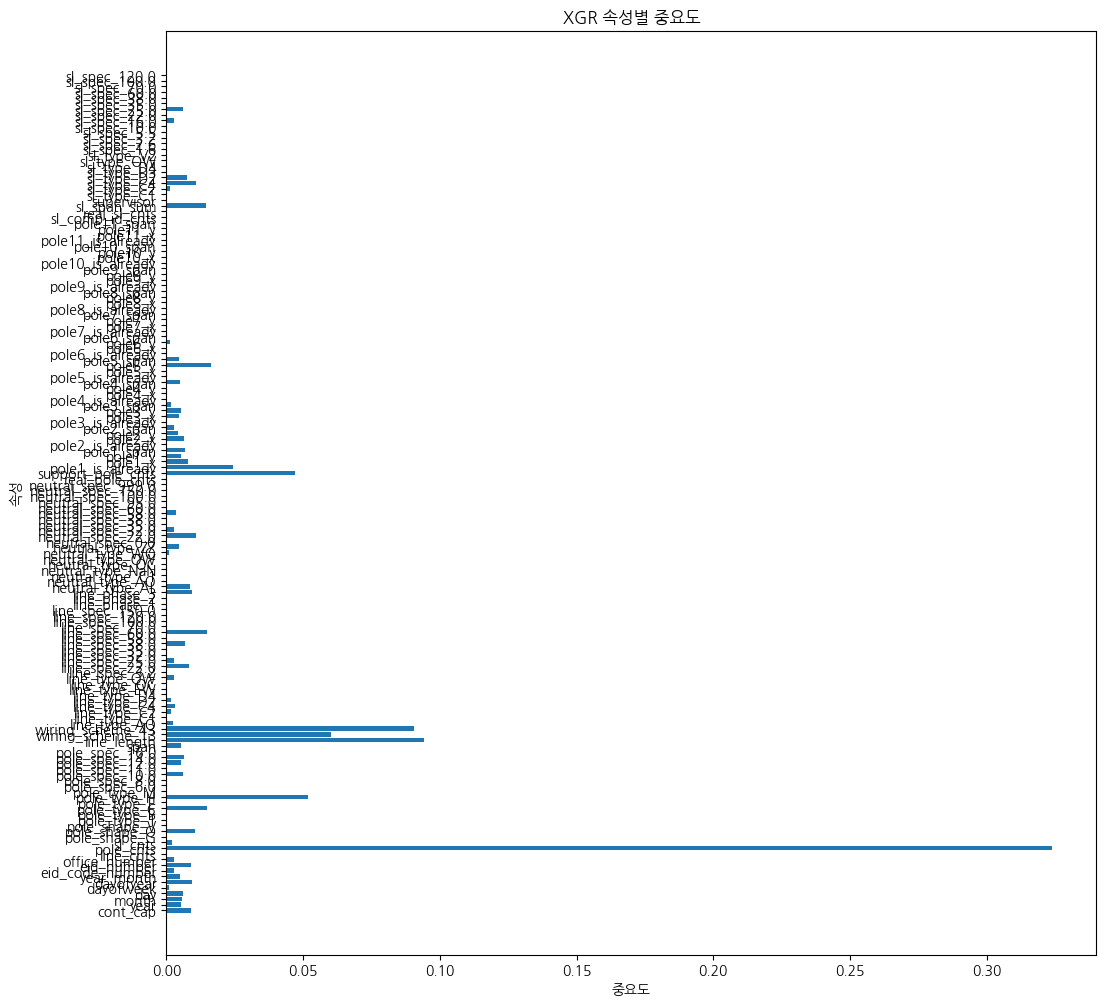

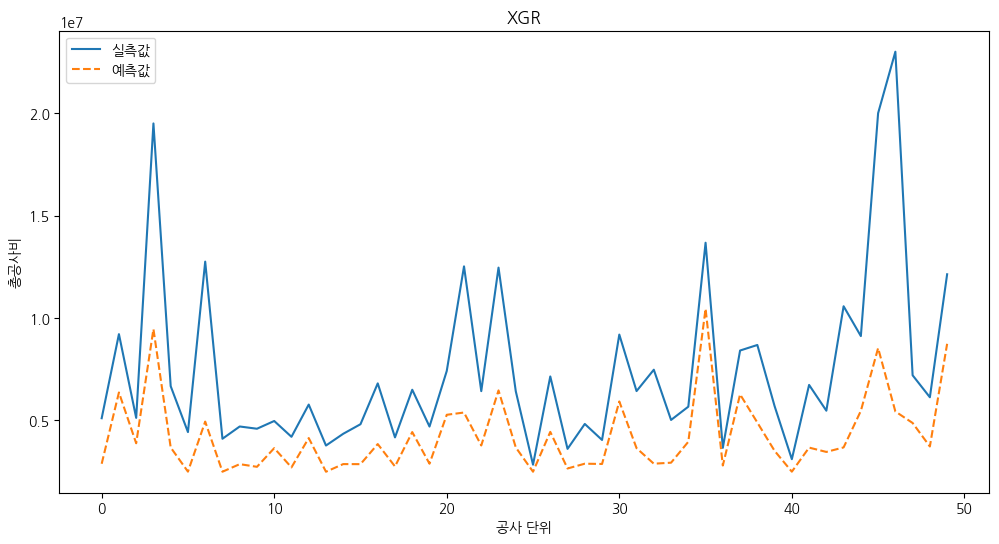

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-1.674459e+20,6.162393e+08,2.333066e+33,4.830183e+16,2.584440e+15
LASSO,7.119657e-01,1.394599e-01,4.013254e+12,2.003311e+06,1.001192e+06
RIDGE,7.155014e-01,1.384347e-01,3.963991e+12,1.990977e+06,9.919042e+05
KNR,5.330527e-01,1.639661e-01,6.506095e+12,2.550705e+06,1.268985e+06
DTR,2.794510e-01,2.206971e-01,1.003959e+13,3.168531e+06,1.592338e+06
RFR,6.369962e-01,1.502272e-01,5.057824e+12,2.248961e+06,1.111555e+06
GBR,6.767688e-01,1.360747e-01,4.503662e+12,2.122183e+06,1.008622e+06
EN,7.074789e-01,1.395525e-01,4.075771e+12,2.018854e+06,1.006151e+06
XGR,7.312491e-02,3.541431e-01,1.291438e+13,3.593659e+06,2.528176e+06
